In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [1]:
import numpy as np
import pandas as pd
train = pd.read_csv('./data/kaggletrain')

In [2]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# map is a Series method
train['sex_map'] = train.Sex.map({'female': 0, 'male': 1})
train.loc[0:4, ['Sex', 'sex_map']]

,Sex,sex_map
0,male,1
1,female,0
2,female,0
3,female,0
4,male,1


In [4]:
# apply() is both a Series method and a DataFrame method
train['name_length'] = train.Name.apply(len)
train.loc[0:4, ['Name', 'name_length']]

,Name,name_length
0,"Braund, Mr. Owen Harris",23
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",51
2,"Heikkinen, Miss. Laina",22
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",44
4,"Allen, Mr. William Henry",24


In [5]:
train['fare_ceil'] = train.Fare.apply(np.ceil)
train.loc[0:4, ['Fare', 'fare_ceil']]

,Fare,fare_ceil
0,7.2500,8.0
1,71.2833,72.0
2,7.9250,8.0
3,53.1000,54.0
4,8.0500,9.0


In [6]:
train.Name.str.split(',').head()

0                           [Braund,  Mr. Owen Harris]
1    [Cumings,  Mrs. John Bradley (Florence Briggs ...
2                            [Heikkinen,  Miss. Laina]
3      [Futrelle,  Mrs. Jacques Heath (Lily May Peel)]
4                          [Allen,  Mr. William Henry]
Name: Name, dtype: object

In [7]:
def get_element(my_list, position):
    return my_list[position]

In [8]:
train['first_name']=train.Name.str.split(',').apply(get_element, position = 0)
train.loc[0:4, ['Name', 'first_name']]

,Name,first_name
0,"Braund, Mr. Owen Harris",Braund
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Cumings
2,"Heikkinen, Miss. Laina",Heikkinen
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Futrelle
4,"Allen, Mr. William Henry",Allen


In [9]:
train.Name.str.split(',').apply(lambda x: x[0]).head()

0       Braund
1      Cumings
2    Heikkinen
3     Futrelle
4        Allen
Name: Name, dtype: object

In [10]:
drinks = pd.read_csv('./data/drinksbycountry.csv')
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


In [11]:
# axis = 0 for maximum value of each column
drinks.loc[:, 'beer_servings': 'wine_servings'].apply(max, axis = 0)

beer_servings      376
spirit_servings    438
wine_servings      370
dtype: int64

In [12]:
# axis = 1 for maximum value of each row
drinks.loc[:, 'beer_servings': 'wine_servings'].apply(max, axis = 1)

0        0
1      132
2       25
3      312
4      217
      ... 
188    333
189    111
190      6
191     32
192     64
Length: 193, dtype: int64

In [13]:
# np.argmax for selecting which column is the max value
drinks.loc[:, 'beer_servings': 'wine_servings'].apply(np.argmax, axis = 1)

0      0
1      1
2      0
3      2
4      0
      ..
188    0
189    0
190    0
191    0
192    0
Length: 193, dtype: int64

In [14]:
# applymap() apply to every element of DataFrame
drinks.loc[:, 'beer_servings': 'wine_servings'] = drinks.loc[:, 'beer_servings': 'wine_servings'].applymap(float)

In [15]:
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0.0,0.0,0.0,0.0,Asia
1,Albania,89.0,132.0,54.0,4.9,Europe
2,Algeria,25.0,0.0,14.0,0.7,Africa
3,Andorra,245.0,138.0,312.0,12.4,Europe
4,Angola,217.0,57.0,45.0,5.9,Africa


#### https://www.youtube.com/watch?v=g_IpO4A7RU4

In [16]:
df = pd.read_csv('./data/iris.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [17]:
capitalize = lambda x: x.upper()
df['species'].apply(capitalize)

0         SETOSA
1         SETOSA
2         SETOSA
3         SETOSA
4         SETOSA
         ...    
145    VIRGINICA
146    VIRGINICA
147    VIRGINICA
148    VIRGINICA
149    VIRGINICA
Name: species, Length: 150, dtype: object

In [18]:
df['species'].map(capitalize)

0         SETOSA
1         SETOSA
2         SETOSA
3         SETOSA
4         SETOSA
         ...    
145    VIRGINICA
146    VIRGINICA
147    VIRGINICA
148    VIRGINICA
149    VIRGINICA
Name: species, Length: 150, dtype: object

In [19]:
df1 = df.drop(['species'], axis = 1)
df1.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [20]:
df1.applymap(np.square)

,sepal_length,sepal_width,petal_length,petal_width
0,26.01,12.25,1.96,0.04
1,24.01,9.00,1.96,0.04
2,22.09,10.24,1.69,0.04
3,21.16,9.61,2.25,0.04
4,25.00,12.96,1.96,0.04
...,...,...,...,...
145,44.89,9.00,27.04,5.29
146,39.69,6.25,25.00,3.61
147,42.25,9.00,27.04,4.00
148,38.44,11.56,29.16,5.29


In [21]:
df1.applymap(np.sqrt)

,sepal_length,sepal_width,petal_length,petal_width
0,2.258318,1.870829,1.183216,0.447214
1,2.213594,1.732051,1.183216,0.447214
2,2.167948,1.788854,1.140175,0.447214
3,2.144761,1.760682,1.224745,0.447214
4,2.236068,1.897367,1.183216,0.447214
...,...,...,...,...
145,2.588436,1.732051,2.280351,1.516575
146,2.509980,1.581139,2.236068,1.378405
147,2.549510,1.732051,2.280351,1.414214
148,2.489980,1.843909,2.323790,1.516575


In [22]:
def multiply50(x):
    if type(x) is str:
        return x
    else:
        return 50*x  

In [23]:
df.applymap(multiply50)

,sepal_length,sepal_width,petal_length,petal_width,species
0,255.0,175.0,70.0,10.0,setosa
1,245.0,150.0,70.0,10.0,setosa
2,235.0,160.0,65.0,10.0,setosa
3,230.0,155.0,75.0,10.0,setosa
4,250.0,180.0,70.0,10.0,setosa
...,...,...,...,...,...
145,335.0,150.0,260.0,115.0,virginica
146,315.0,125.0,250.0,95.0,virginica
147,325.0,150.0,260.0,100.0,virginica
148,310.0,170.0,270.0,115.0,virginica


In [24]:
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

#### Anonymous Function = Lambda Expression

In [25]:
lambda x: 3 * 1 + 1

<function __main__.<lambda>(x)>

In [26]:
g = lambda x: 3 * x + 1

In [27]:
g(2)

7

In [28]:
g(11)

34

In [30]:
# lambda expression with multiple inputs
full_name = lambda fn, ln: fn.strip().title() + " " + ln.strip().title()
full_name("  Trump", "donald ")

'Trump Donald'

**Lambda Expression**

lambda x1, x2, ..., xn: <expression>

For example:
    
lambda x, y, z: 3/(1/x + 1/y + 1/z)   # Harmonic Mean

In [47]:
scifi_authors = ["Issac Asimov", "Ray Bradbury", "Robert Heinlein", "Arthus C. Clarke",
                "Frank Herbert", "Orson Scott Card", "Douglas Adams", "H.G.Wells", 
                "Leigh Brackett"]

scifi_authors.sort(key = lambda name: name.split(" ")[-1].lower(), reverse= False)
scifi_authors

['Douglas Adams',
 'Issac Asimov',
 'Leigh Brackett',
 'Ray Bradbury',
 'Orson Scott Card',
 'Arthus C. Clarke',
 'H.G.Wells',
 'Robert Heinlein',
 'Frank Herbert']

In [48]:
def build_quadratic_func(a, b, c):
    """ Returns the function f(x) = ax^2 + bx + c"""
    return lambda x: a*x**2 + b*x + c

f = build_quadratic_func(2,3,-5)

In [49]:
f(0)

-5

In [50]:
f(1)


0

In [51]:
f(2)

9

In [53]:
build_quadratic_func(3,0,1)(2)    # 3x^2 + 1 evaluated for x = 2

13

# Python Lambda Functions

https://www.youtube.com/watch?v=Ob9rY6PQMfI

Anonymous, single-use, or throw-away functions.

**lambda arguments: expressioin**


In [1]:
add5 = lambda x: x+5
add5(88)

93

In [2]:
square = lambda x: x*x
square(75)

5625

In [5]:
get_tens = lambda x: int(x/10) % 10
print(get_tens(769))
print(get_tens(1809))

6
0


In [1]:
add_3 = lambda x, y, z: x + y + z 
add_3(5,6,7)

18

In [4]:
# lambda with branch
func = lambda x: x ** 2 if x >= 0 else -x
func(8)
func(-9)

64

9

**Lambda as an argument in other functions**

One of the most popular uses for lambda functions is as an argument inside sort, sorted, map or filter functions.

**Sorting a List of Tuples using Lambda**

In [6]:
list1 = [('eggs', 5.25), ('honey', 9.70), ('peaches', 11.0), ('carrots', 7.5)]
list1.sort(key = lambda x: x[0])
print(list1)

[('carrots', 7.5), ('eggs', 5.25), ('honey', 9.7), ('peaches', 11.0)]


In [7]:
list1.sort(key = lambda x: x[1])
list1

[('eggs', 5.25), ('carrots', 7.5), ('honey', 9.7), ('peaches', 11.0)]

**Sorting a List of Dictionaries using Lambda**

In [10]:
import pprint as pp
list1 = [{'make': 'Ford', 'model': 'Focus', 'year': 2012},
        {'make': 'Tesla', 'model': 'X', 'year': 1999},
        {'make': 'Mercedes', 'model': 'Bingo', 'year': 2014}]

list2 = sorted(list1, key= lambda x: x['year'])  # change x['year'] to x['make'], ...
pp.pprint(list2)

[{'make': 'Tesla', 'model': 'X', 'year': 1999},
 {'make': 'Ford', 'model': 'Focus', 'year': 2012},
 {'make': 'Mercedes', 'model': 'Bingo', 'year': 2014}]


**Sort a dictionary with key**

In [6]:
dict1 = {'a': 25, 'c': 27, 'd':26, 'b': 28}
dict1_sort = sorted(dict1.items(), key = lambda x: x[0])
dict1_sort

[('a', 25), ('b', 28), ('c', 27), ('d', 26)]

**Sort a dictionary with value**

In [7]:
dict1 = {'a': 25, 'c': 27, 'd':26, 'b': 28}
dict1_sort = sorted(dict1.items(), key = lambda x: x[1])
dict1_sort

[('a', 25), ('d', 26), ('c', 27), ('b', 28)]

**Filtering a List of Integers using Lamba**

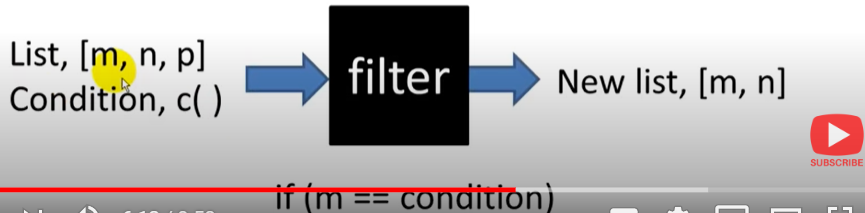

In [11]:
list1 = [1,2,3,4,5,6,7]
list2 = list(filter(lambda x: x%2 == 0, list1))
list2

[2, 4, 6]

In [12]:
odds = lambda x: x%2 == 1
list1 = [1,2,3,4,5,6,7]
list2 = list(filter(odds, list1))
list2

[1, 3, 5, 7]

filter() 与map()的区别在于filter()将只返回应用函数返回为True的元素。


In [3]:
numbers = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]

def filter_odd_numbers(num):
    if num % 2 == 0:
        return True
    else:
        return False

filter_odd_numbers = filter(filter_odd_numbers, numbers)
list(filter_odd_numbers)

[2, 4, 6, 8, 10, 12, 14]

**Lambda Function on a List using Map**

In [13]:
list1 = [1,2,3,4,5,6,7]
list2 = list(map(lambda x: x **2, list1))
list2

[1, 4, 9, 16, 25, 36, 49]

In [14]:
square = lambda x: x ** 2
list1 = [1,2,3,4,5,6,7]
list2 = list(map(square, list1))
list2

[1, 4, 9, 16, 25, 36, 49]

**Map+ Filter with lambda**

In [11]:
ls = list(map(lambda x: x** 2, range(1,11)))
list(filter(lambda x: x % 2 == 0, ls))

[4, 16, 36, 64, 100]

**Lambda Conditoinals**

lambda args: a if boolean_expression else b

In [18]:
starts_with_J = lambda x: True if x.startswith('J') else False
starts_with_J('Joey')

True

In [19]:
wordb4 = lambda s,w: s.split()[s.split().index(w) - 1] if w in s else None
sentence = "Four scores and seven years ago"
wordb4(sentence, 'seven')

'and'

**Lambdas on DataTime Objects**


In [24]:
import datetime

now = datetime.datetime.now()
print(now)
year = lambda x: x.day
print(year(now))

2020-07-01 15:01:20.752186
1


In [27]:
def do_something(f, val):
    return f(val)

func = lambda x: x ** 3
print(func(16))
print(do_something(func, 4))

4096
64


**Extreme Lambda**

In [32]:
isnum = lambda q: q.replace('.','',1).isdigit()
print(isnum('4365'))
print(isnum('3.14159'))
print(isnum('T57'))
print(isnum('-16'))

is_num = lambda r: isnum(r[1:]) if r[0] == '-' else isnum(r)
print(is_num('-178.9'))

tonum = lambda s: float(s) if is_num(s) else -1
print(tonum('30y'))
print(tonum('-12.34'))
print(tonum('-21.67'))

True
True
False
False
True
-1
-12.34
-21.67


# map

https://www.youtube.com/watch?v=cKlnR-CB3tk

Apply same function to each element of a sequence
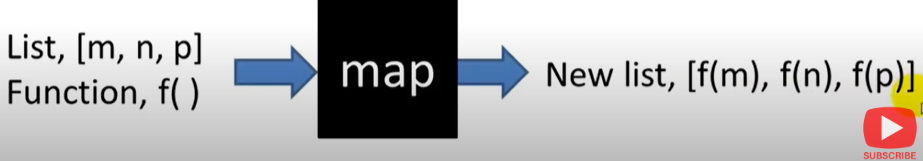

In [33]:
list1 = [4,3,2,1]
list(map(lambda x: x ** 2, list1))

[16, 9, 4, 1]

In [34]:
list1 = [4,3,2,1]
list([x** 2 for x in list1])

[16, 9, 4, 1]

In [6]:
def square_it_func(a):
    return a * a

x = map(square_it_func, [1,3,5])
print(list(x))

def multiplier_func(a, b):
    return a * b 

x = map(multiplier_func, [1,4,7], (2,5,8))
print(list(x))

[1, 9, 25]
[2, 20, 56]


# Reduce

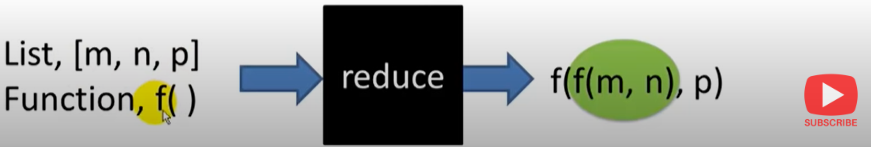

In [45]:
# reduce was removed from python 3 built-in function
from functools import reduce

list1 = [5,4,3,2,1]
mul = lambda x, y: x * y
reduce(mul, list1)

120